In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import random

In [38]:
plt.rcParams["figure.figsize"] = (12,8)
sns.set()

In [39]:
df = pd.read_csv(r"Semester20221_IntroToDataScience_CapstoneProject\data\laptop_concat.csv")
# df.drop(labels = ['Intel_gpu', 'AMD_gpu', 'NVIDIA_gpu'], axis=1, inplace=True)

In [40]:
df['battery'].replace(10, np.NaN, inplace=True)

In [41]:
len(df)

878

In [42]:
df.isnull().sum()

name                0
website             0
battery           163
weight            182
laptop_brand        0
monitor_size        3
ram_capacity        2
ram_type          148
HDD_capacity        1
SSD_capacity        1
cpu_brand           0
cpu_core_num      114
cpu_thread_num    124
avg_bench         107
gamming           107
desktop           107
workstation       107
gpu_score          63
price               0
dtype: int64

In [43]:
pd.DataFrame(df.nunique())

,0
name,863
website,2
battery,73
weight,130
laptop_brand,17
monitor_size,19
ram_capacity,7
ram_type,9
HDD_capacity,5
SSD_capacity,11


### Check column properties

In [44]:
df.columns

Index(['name', 'website', 'battery', 'weight', 'laptop_brand', 'monitor_size',
       'ram_capacity', 'ram_type', 'HDD_capacity', 'SSD_capacity', 'cpu_brand',
       'cpu_core_num', 'cpu_thread_num', 'avg_bench', 'gamming', 'desktop',
       'workstation', 'gpu_score', 'price'],
      dtype='object')

In [45]:
# Columns and their respective dtypes

df.dtypes

name               object
website            object
battery           float64
weight            float64
laptop_brand       object
monitor_size      float64
ram_capacity      float64
ram_type           object
HDD_capacity      float64
SSD_capacity      float64
cpu_brand          object
cpu_core_num      float64
cpu_thread_num    float64
avg_bench         float64
gamming           float64
desktop           float64
workstation       float64
gpu_score         float64
price             float64
dtype: object

In [46]:
categorical_cols = ["monitor_panel", "monitor_display", "monitor_torch_screen", 
                    "monitor_blue_light_filter", "monitor_LED_backlit",
                    "monitor_anti_glare", "ram_type", "connection_type_c", "connection_usb_a", 
                    "connection_thunderbolt", "cpu_core_num", "cpu_thread_num", "ram_capacity", "cpu_brand"]

string_cols = ["website", "laptop_brand", "cpu_name", "gpu", "monitor_panel", "monitor_display", "ram_type", "cpu_brand"]

continuous_cols = list(set(df.columns).difference(categorical_cols + string_cols))
continuous_cols.remove("price")

numerics_cols = list(set(df.columns).difference(string_cols))
numerics_cols.remove("price")

### Price column EDA

In [47]:
# assert that the target doesn't contain any null

df['price'].isnull().sum()

0

In [48]:
df[['price']].describe()

,price
count,8.780000e+02
mean,2.806151e+07
std,1.757122e+07
min,3.590000e+06
25%,1.681500e+07
50%,2.299000e+07
75%,3.299000e+07
max,1.399900e+08


Text(0.5, 1.0, 'Laptop Price')

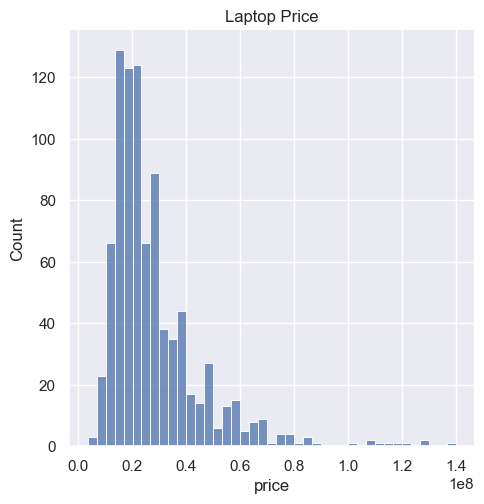

In [49]:
sns.displot(df['price'])
plt.title("Laptop Price")

#### Correlation of price vs other numerical column

C:\Users\Acer\AppData\Local\Temp\ipykernel_8420\1749522078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df[numerics_cols + ["price"]].corr()


Text(0.5, 1.0, 'Correlation maxtrix')

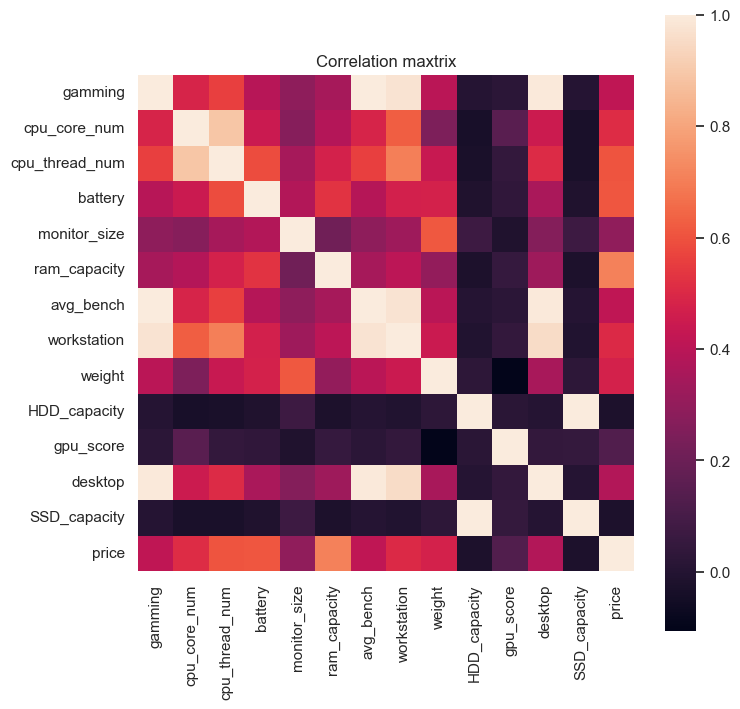

In [51]:
corrmat = df[numerics_cols + ["price"]].corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title("Correlation maxtrix")

##### Sort correlation in descending

In [52]:
abs(corrmat['price']).sort_values(ascending=False)

price             1.000000
ram_capacity      0.706673
battery           0.610118
cpu_thread_num    0.602752
cpu_core_num      0.511688
workstation       0.499755
weight            0.475596
gamming           0.415103
avg_bench         0.414307
desktop           0.381964
monitor_size      0.292519
gpu_score         0.129232
HDD_capacity      0.021325
SSD_capacity      0.019922
Name: price, dtype: float64

### Explore numerical features

In [53]:
df[numerics_cols].describe()

,gamming,cpu_core_num,cpu_thread_num,battery,monitor_size,ram_capacity,avg_bench,workstation,weight,HDD_capacity,gpu_score,desktop,SSD_capacity
count,771.000000,764.000000,754.000000,715.000000,875.000000,876.000000,771.000000,771.000000,696.000000,8.770000e+02,815.000000,771.000000,8.770000e+02
mean,68.089494,7.117801,11.831565,58.023385,14.958057,12.424658,68.134371,62.806744,1.630592,5.845097e+03,94.550454,72.456550,6.396595e+03
std,24.031982,3.449960,4.537524,18.868921,1.095179,7.133825,24.030043,25.978718,0.516570,1.729245e+05,44.262317,24.047985,1.729069e+05
min,0.000000,2.000000,2.000000,2.000000,11.600000,4.000000,0.000000,0.000000,0.736000,0.000000e+00,1.430000,0.000000,0.000000e+00
25%,60.000000,4.000000,8.000000,45.000000,14.000000,8.000000,60.200000,50.000000,1.199000,0.000000e+00,58.500000,67.000000,2.560000e+02
50%,71.000000,6.000000,12.000000,56.000000,15.600000,8.000000,71.400000,63.000000,1.600000,0.000000e+00,112.000000,76.000000,5.120000e+02
75%,79.500000,8.000000,16.000000,70.000000,15.600000,16.000000,79.550000,76.000000,2.000000,0.000000e+00,139.000000,83.000000,5.120000e+02
max,114.000000,16.000000,24.000000,100.000000,17.300000,64.000000,114.000000,126.000000,4.100000,5.121024e+06,154.000000,114.000000,5.121024e+06


In [54]:
len(numerics_cols)

14

#### Plot against "price" 

IndexError: list index out of range

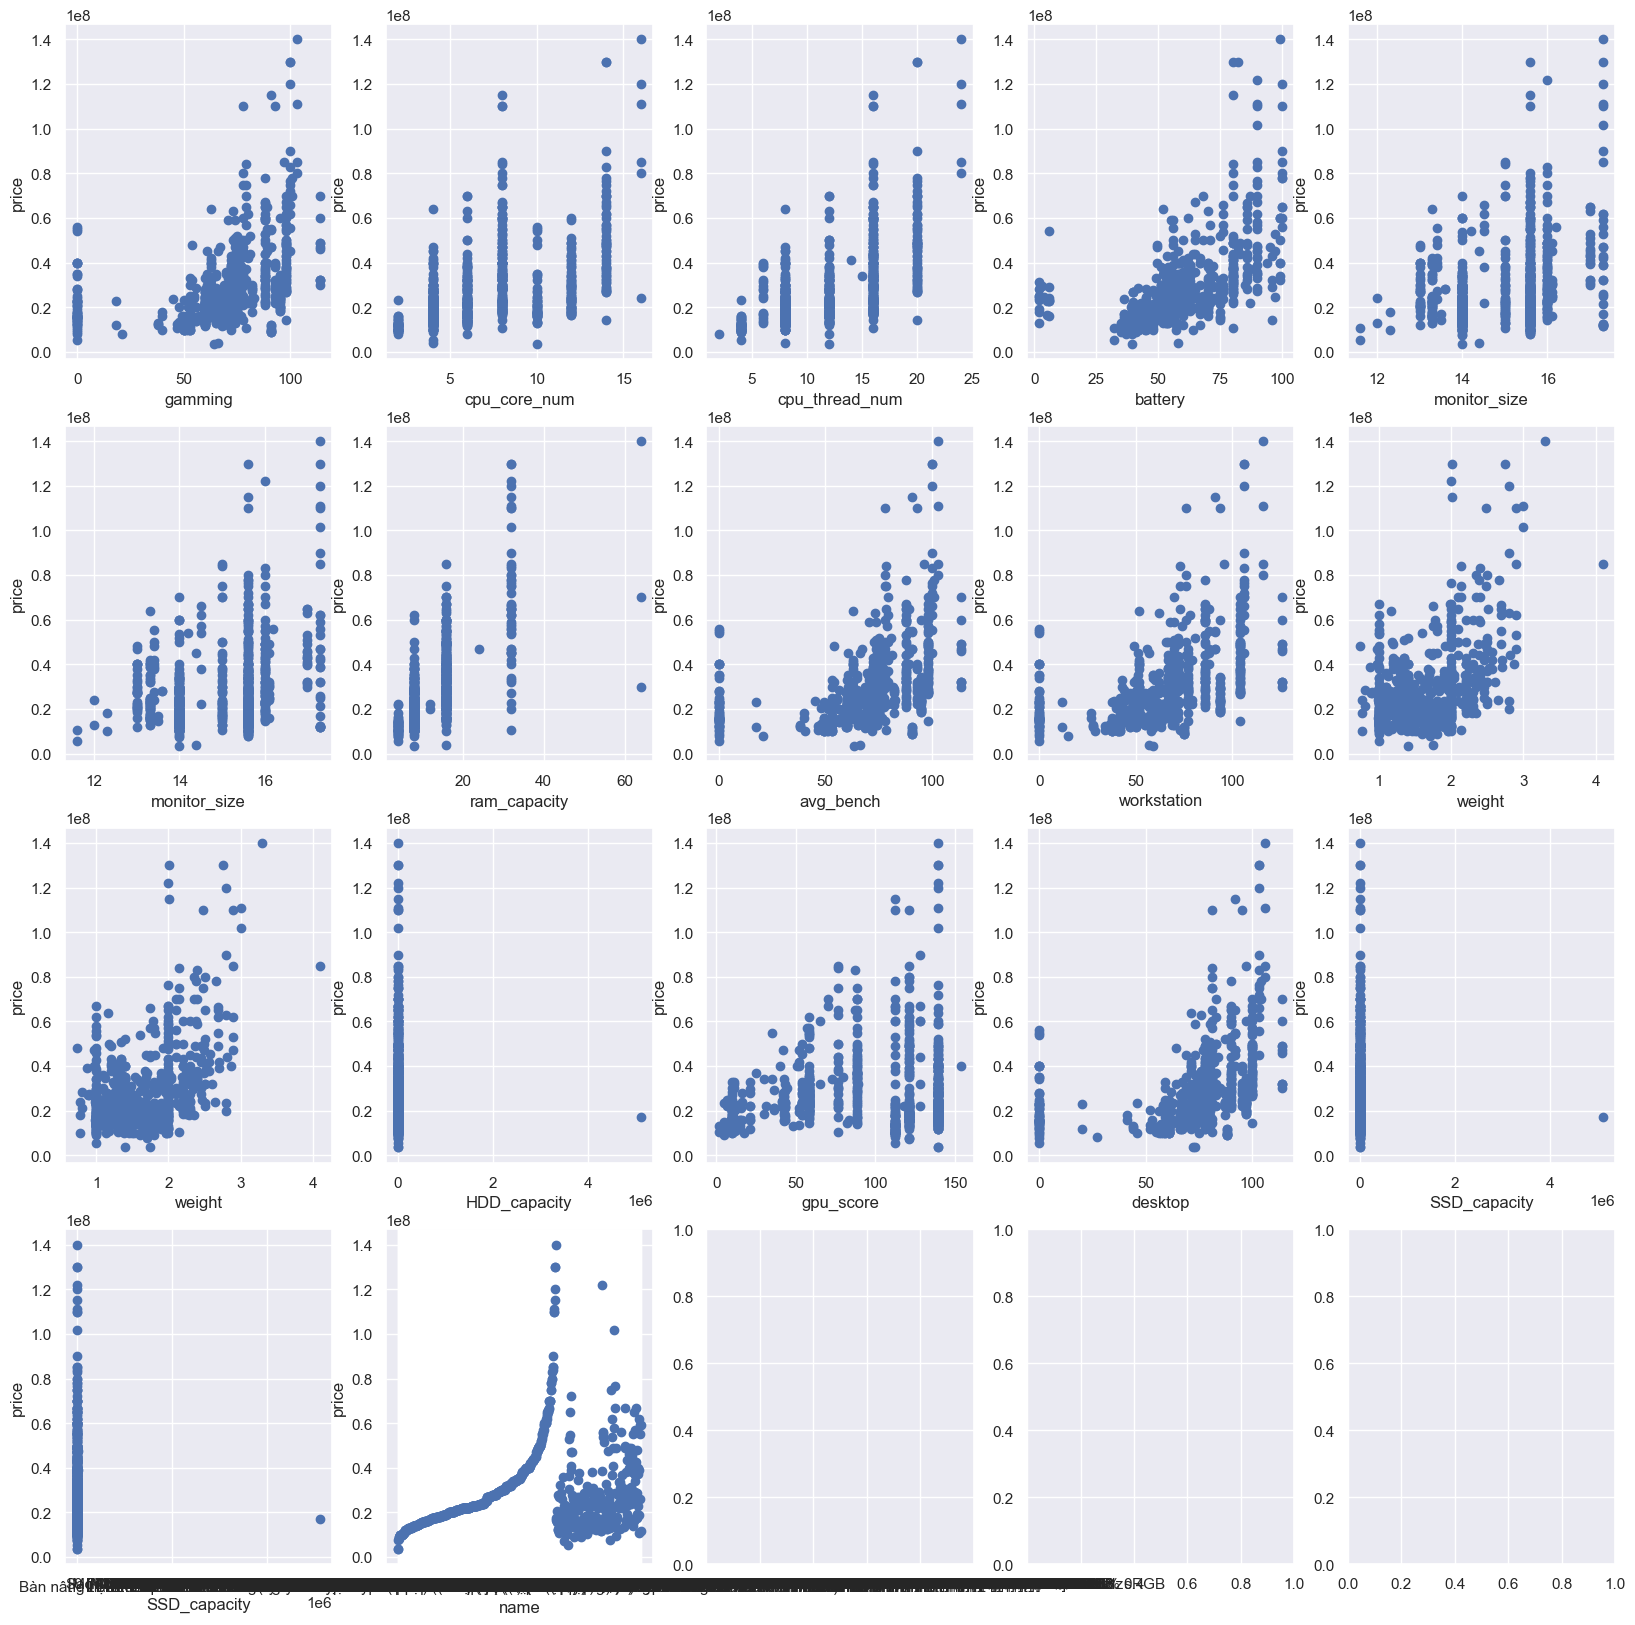

In [55]:
fig, ax = plt.subplots(4, 5, figsize=(20, 20))
for i in range(4):
    for j in range(5):
        ax[i, j].scatter(df[numerics_cols[i * 4 + j]], df['price'])
        ax[i, j].set_xlabel(numerics_cols[i * 4 + j])
        ax[i, j].set_ylabel("price")

#### We'll explore features with highest correlation with price

In [56]:
top_features = ["battery", "ram_capacity", "cpu_thread_num", "SSD_capacity", "cpu_core_num", "monitor_refresh_rate"]

In [57]:
def plot_groupby(col: str, fig_size = (25, 5)):
    print("Value count of {}".format(col))
    print(df[col].value_counts().sort_values())
    sns.displot(df[col])
    sns.boxplot(y = 'price', x = col, data = df)

##### Battery

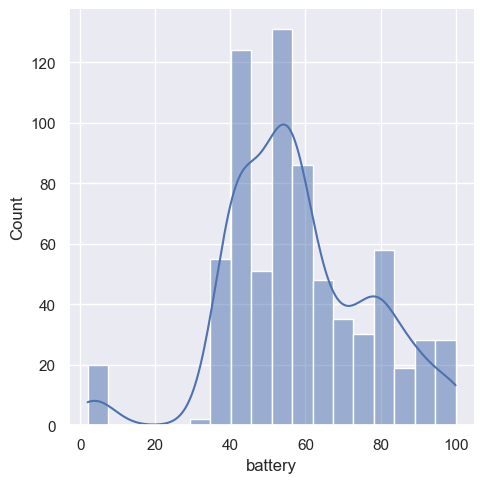

In [58]:
sns.displot(df['battery'], kde=True)

##### Ram capacity

Value count of ram_capacity
24.0      1
12.0      2
64.0      3
4.0      45
32.0     53
16.0    324
8.0     448
Name: ram_capacity, dtype: int64


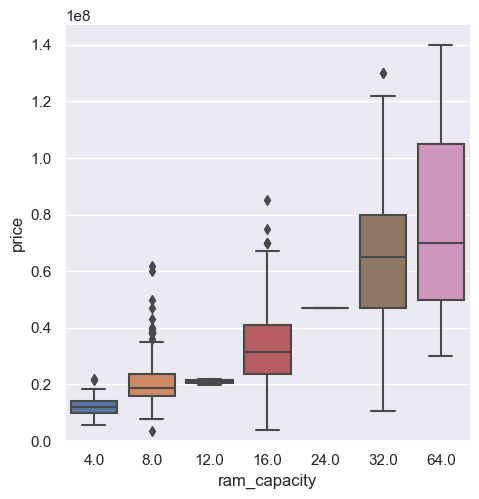

In [59]:
plot_groupby("ram_capacity")

##### SSD Capacity

In [60]:
df= df.drop(index = df[df["SSD_capacity"]>4000].index).reset_index(drop = True)
df= df.drop(index = df[df["SSD_capacity"]==0].index).reset_index(drop = True)

In [61]:
df["SSD_capacity"].replace(1000, 1024, inplace = True)

Value count of SSD_capacity
128.0      13
2048.0     17
1024.0    103
256.0     233
512.0     503
Name: SSD_capacity, dtype: int64


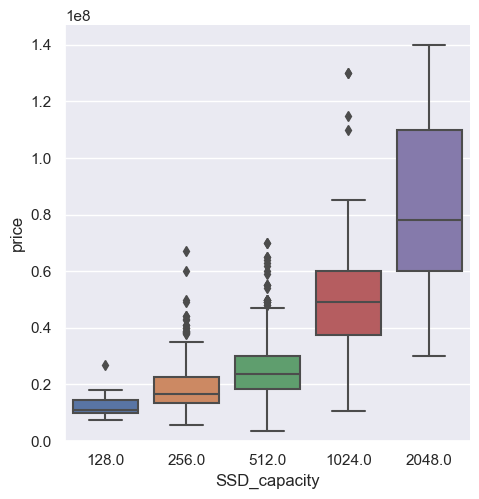

In [62]:
plot_groupby("SSD_capacity")

<AxesSubplot: xlabel='SSD_capacity', ylabel='price'>

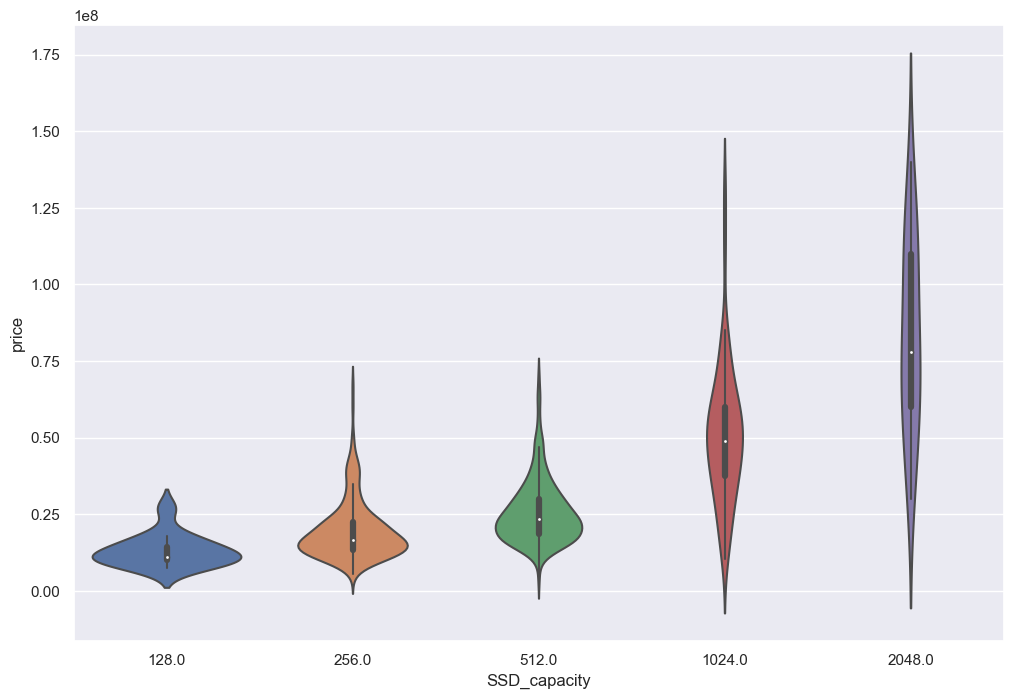

In [63]:
sns.violinplot(data = df, x = 'SSD_capacity', y = 'price')

##### CPU thread num

Value count of cpu_thread_num
2.0       1
15.0      1
14.0      1
24.0      5
6.0      17
4.0      45
20.0     62
12.0    176
16.0    193
8.0     249
Name: cpu_thread_num, dtype: int64


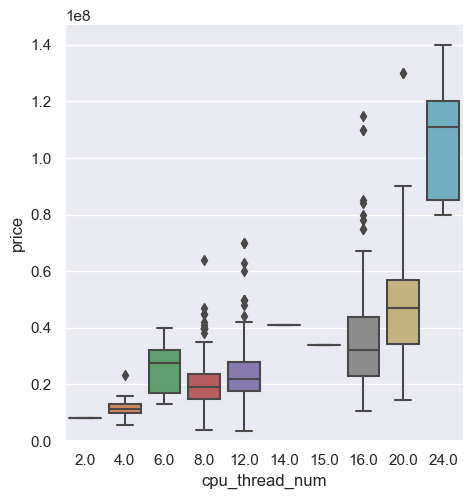

In [64]:
plot_groupby("cpu_thread_num")

#### CPU core num

Value count of cpu_core_num
16.0      6
2.0      42
10.0     50
14.0     57
12.0     73
6.0     144
8.0     158
4.0     230
Name: cpu_core_num, dtype: int64


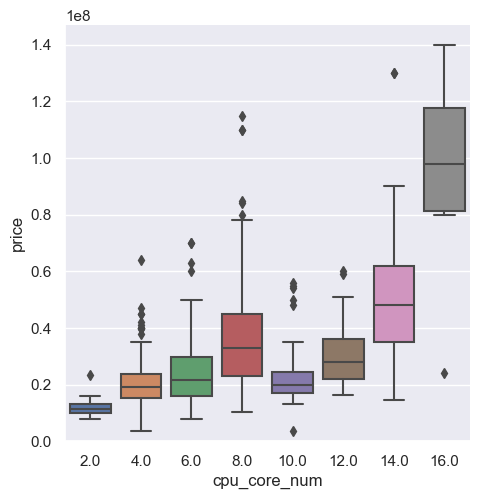

In [65]:
plot_groupby("cpu_core_num")

<AxesSubplot: xlabel='cpu_core_num', ylabel='cpu_thread_num'>

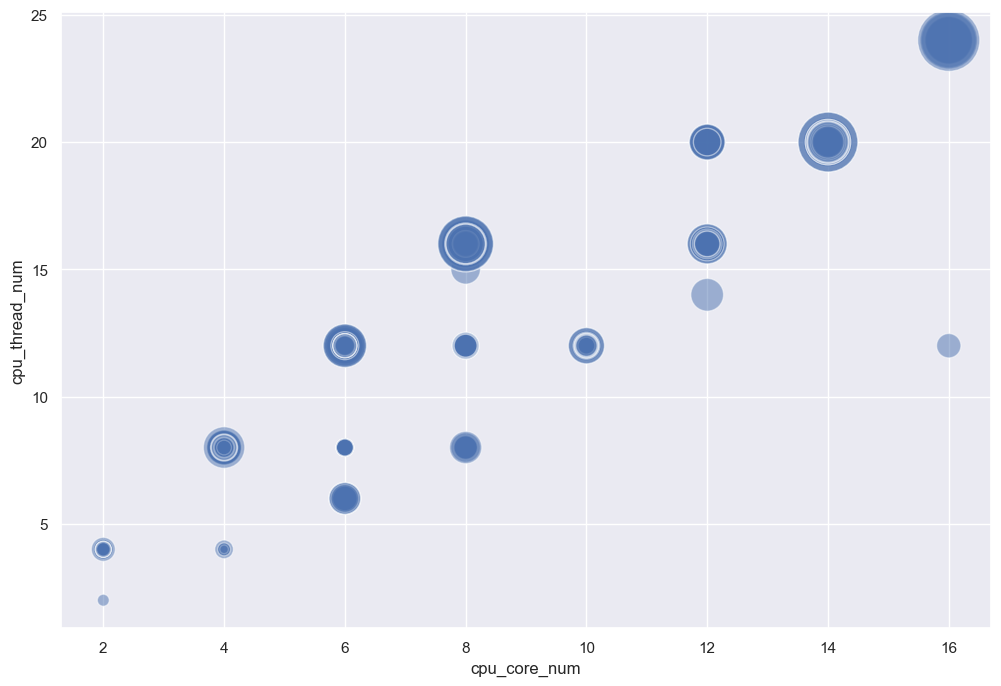

In [66]:
sns.scatterplot(data=df, x="cpu_core_num", y="cpu_thread_num", size="price",alpha=0.5, legend=False, sizes = (10,2000))

### Explore string features

<AxesSubplot: xlabel='cpu_brand', ylabel='price'>

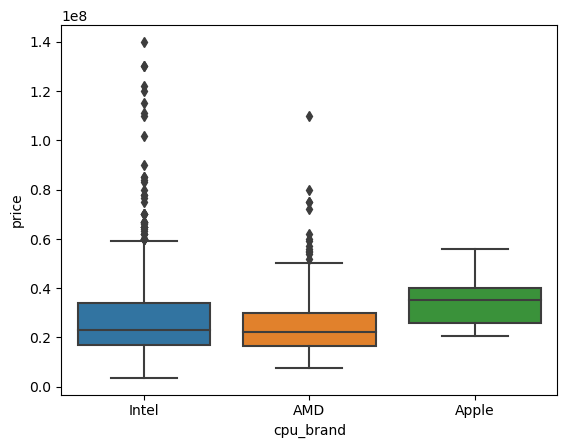

In [32]:

sns.boxplot(y = "price", x = "cpu_brand", data = df)

#### Ram type

Value count of ram_type
DDR3L                  1
LPDDR3L                1
DDR5-4800 SO-DIMM      1
LPDDDR5                1
LPDDR3                13
LPDDR4x               25
LPDDR5                55
DDR5                 107
DDR4                 519
Name: ram_type, dtype: int64


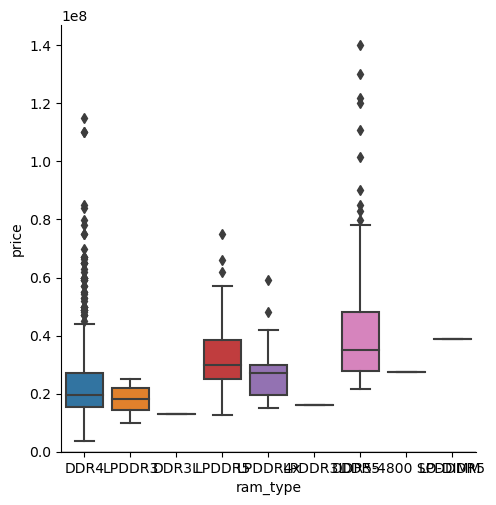

In [33]:
plot_groupby("ram_type")

In [34]:
def normalize_ram(x):
    if x == "DDR5-4800 SO-DIMM":
        return "DDR5"
    elif x == "LPDDDR5":
        return "LPDDR5"
    elif x == "LPDDR3L" or x == "DDR3L":
        return "LPDDR3"
    else:
        return x

df["ram_type"] = df["ram_type"].apply(normalize_ram)

<AxesSubplot: xlabel='ram_type', ylabel='price'>

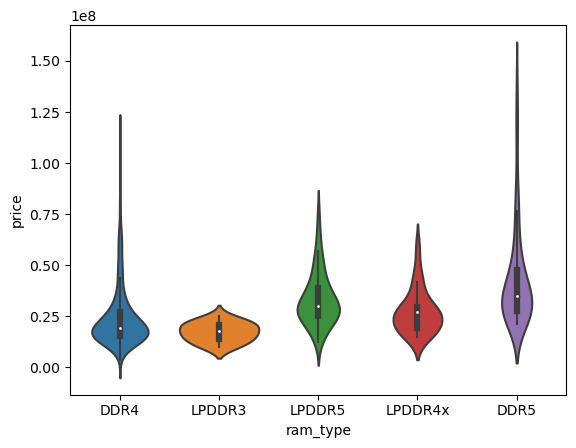

In [35]:
sns.violinplot(data = df, x = 'ram_type', y = 'price')

<AxesSubplot: xlabel='laptop_brand', ylabel='price'>

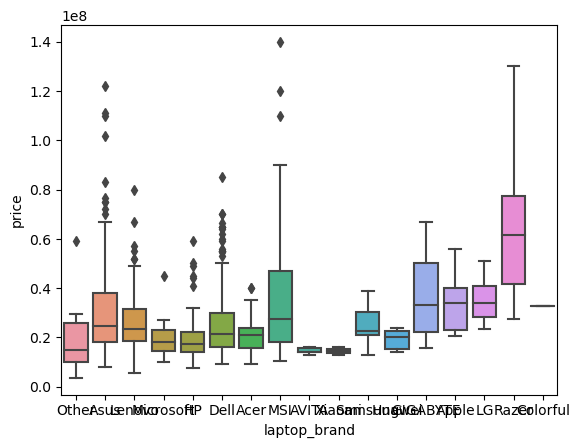

In [36]:
sns.boxplot(data = df, x = 'laptop_brand' , y ='price')

<AxesSubplot: xlabel='website', ylabel='price'>

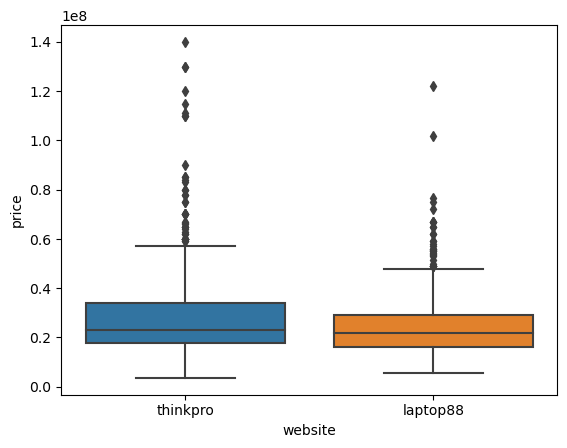

In [37]:
sns.boxplot(data = df, x = 'website' , y ='price')

<AxesSubplot: xlabel='gpu_score', ylabel='price'>

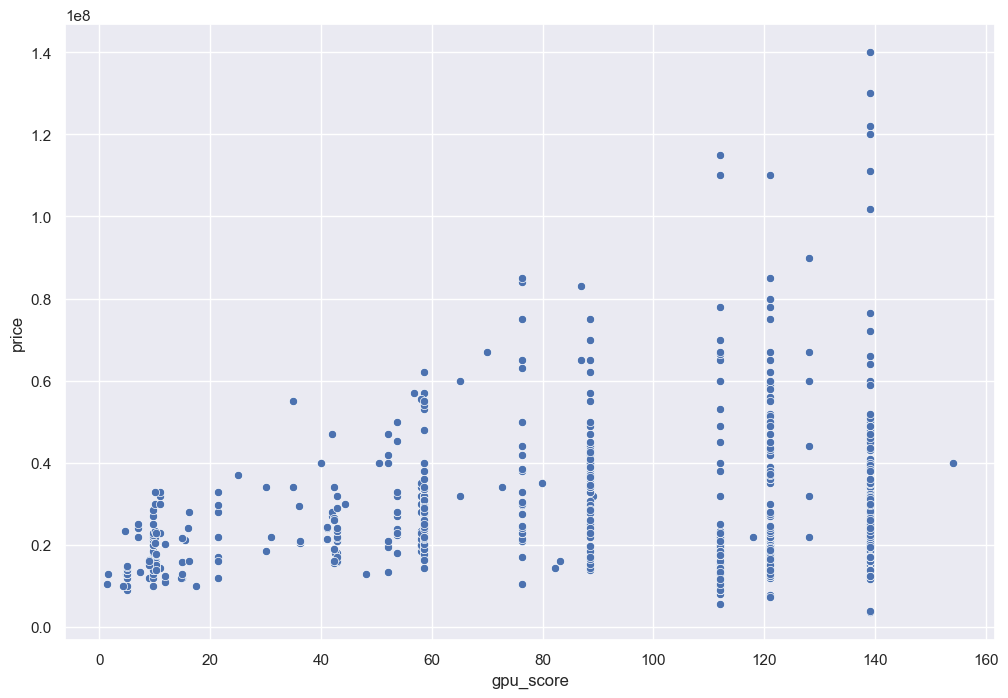

In [67]:
sns.scatterplot(data=df, x="gpu_score", y="price")

<AxesSubplot: xlabel='avg_bench', ylabel='price'>

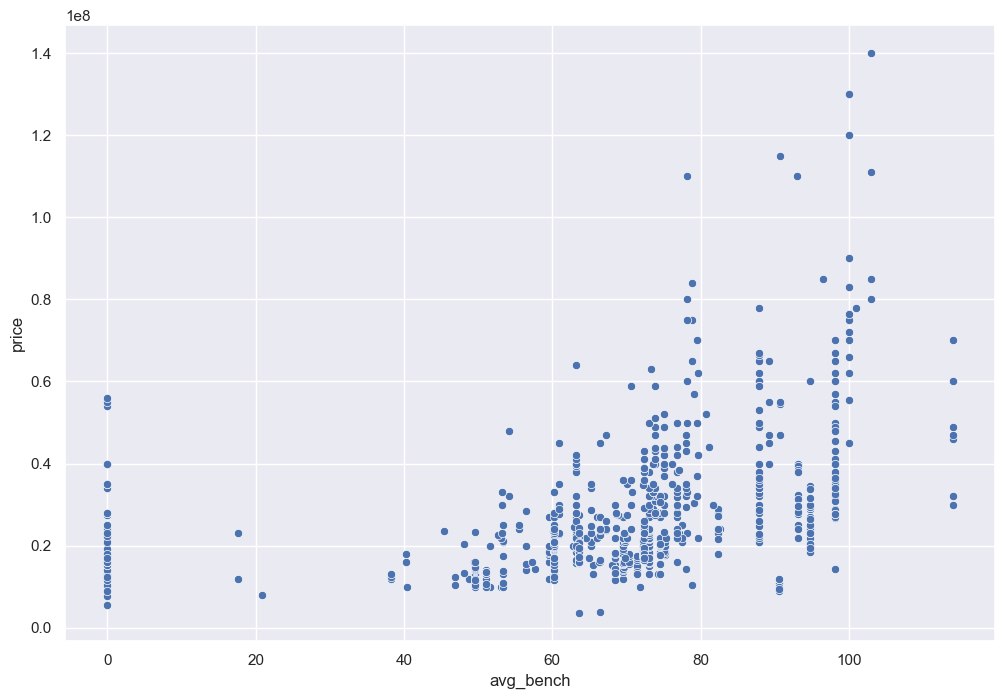

In [68]:
sns.scatterplot(data=df, x="avg_bench", y="price")